In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader

import warnings
warnings.filterwarnings('ignore')

from pytorch_tools import train_model_cls, plot_metrics

In [2]:
train_transformer = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
val_transformer = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [3]:
train_dataset = datasets.ImageFolder(
    'data/Module_3_Lecture_2_hymenoptera_data/train',
    transform=train_transformer
)

val_dataset = datasets.ImageFolder(
    'data/Module_3_Lecture_2_hymenoptera_data/val',
    transform=val_transformer
)

In [4]:
train_loader = DataLoader(
    train_dataset,
    batch_size=32,  
    shuffle=True,   
    num_workers=0   
)
val_loader = DataLoader(
    val_dataset,
    batch_size=32, 
    shuffle=False, 
    num_workers=0
)

In [5]:
device = 'mps' if torch.backends.mps.is_available() else 'cpu'
print("Використовується пристрій:", device)

Використовується пристрій: mps


In [6]:
model_ft = models.resnet18(weights='IMAGENET1K_V1')
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 2)

criterion = nn.CrossEntropyLoss()
optimizer_ft = optim.Adam(model_ft.parameters(), lr=1e-05)

In [7]:
metrics, model = train_model_cls(
    num_classes=2,
    num_epoch=10,
    train_dataloader=train_loader,
    test_dataloader=val_loader,
    model=model_ft,
    criterion=criterion,
    optimizer=optimizer_ft,
    device=device,
    info_every_iter=1,
    show_val_metrics=False
)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [1/10] Train Loss: 54.5839 Acc: 0.4385 Rec: 0.3223 Prec: 0.4149
Epoch [2/10] Train Loss: 51.0692 Acc: 0.6516 Rec: 0.5207 Prec: 0.7000
Epoch [3/10] Train Loss: 49.5891 Acc: 0.7951 Rec: 0.7107 Prec: 0.8515
Epoch [4/10] Train Loss: 48.5102 Acc: 0.8238 Rec: 0.7603 Prec: 0.8679
Epoch [5/10] Train Loss: 48.0258 Acc: 0.8811 Rec: 0.8430 Prec: 0.9107
Epoch [6/10] Train Loss: 47.3203 Acc: 0.9016 Rec: 0.8926 Prec: 0.9076
Epoch [7/10] Train Loss: 48.2629 Acc: 0.9016 Rec: 0.8678 Prec: 0.9292
Epoch [8/10] Train Loss: 47.5318 Acc: 0.9098 Rec: 0.8926 Prec: 0.9231
Epoch [9/10] Train Loss: 46.1990 Acc: 0.9426 Rec: 0.9174 Prec: 0.9652
Epoch [10/10] Train Loss: 46.3973 Acc: 0.9385 Rec: 0.9504 Prec: 0.9274


In [8]:
model_conv = torchvision.models.resnet18(weights='IMAGENET1K_V1')
for param in model_conv.parameters():
    param.requires_grad = False

num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

criterion = nn.CrossEntropyLoss()
optimizer_conv = optim.Adam(model_conv.fc.parameters(), lr=1e-03)

In [9]:
metrics, model = train_model_cls(
    num_classes=2,
    num_epoch=10,
    train_dataloader=train_loader,
    test_dataloader=val_loader,
    model=model_conv,
    criterion=criterion,
    optimizer=optimizer_conv,
    device=device,
    info_every_iter=1,
    show_val_metrics=True
)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [1/10] Train Loss: 53.4366 Acc: 0.5492 Rec: 0.4545 Prec: 0.5556
Epoch [1/10] Val Loss: 56.1037 Acc: 0.7778 Rec: 0.9277 Prec: 0.7333
Epoch [2/10] Train Loss: 49.9748 Acc: 0.6844 Rec: 0.9339 Prec: 0.6209
Epoch [2/10] Val Loss: 56.4854 Acc: 0.7582 Rec: 1.0000 Prec: 0.6917
Epoch [3/10] Train Loss: 48.3434 Acc: 0.7049 Rec: 0.9917 Prec: 0.6283
Epoch [3/10] Val Loss: 56.8450 Acc: 0.7516 Rec: 1.0000 Prec: 0.6860
Epoch [4/10] Train Loss: 47.1901 Acc: 0.7377 Rec: 1.0000 Prec: 0.6541
Epoch [4/10] Val Loss: 57.0677 Acc: 0.7712 Rec: 1.0000 Prec: 0.7034
Epoch [5/10] Train Loss: 47.2028 Acc: 0.7623 Rec: 1.0000 Prec: 0.6760
Epoch [5/10] Val Loss: 56.8778 Acc: 0.8366 Rec: 1.0000 Prec: 0.7685
Epoch [6/10] Train Loss: 46.6240 Acc: 0.8648 Rec: 1.0000 Prec: 0.7857
Epoch [6/10] Val Loss: 56.7775 Acc: 0.8954 Rec: 0.9759 Prec: 0.8526
Epoch [7/10] Train Loss: 47.2820 Acc: 0.8975 Rec: 0.9587 Prec: 0.8529
Epoch [7/10] Val Loss: 56.6685 Acc: 0.9477 Rec: 0.9398 Prec: 0.9630
Epoch [8/10] Train Loss: 47.0853 A

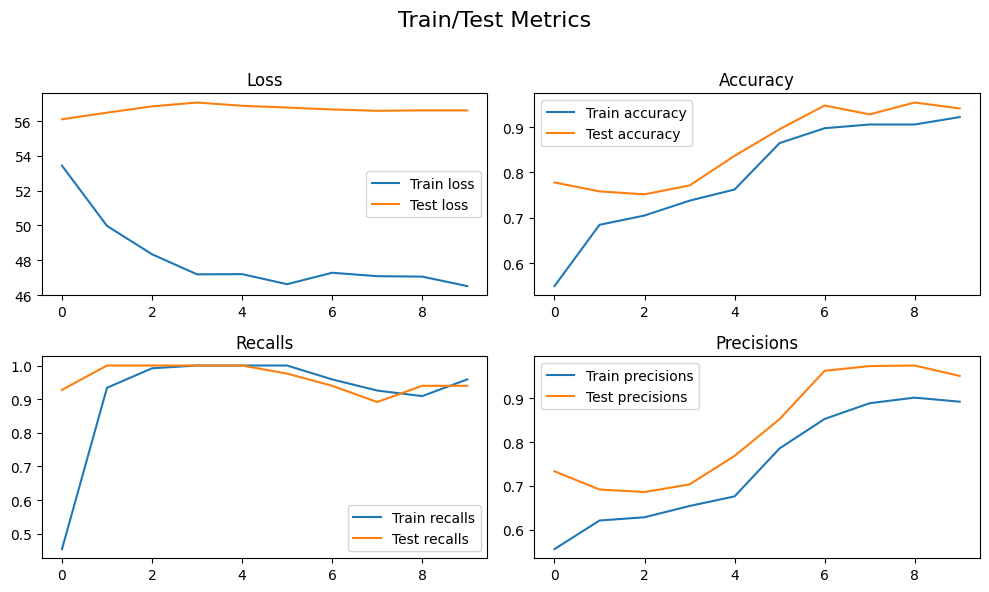

In [10]:
plot_metrics(metrics)